### Autonomous work 3

Download the `lunarnasai31m.jpg` image from the example files and remove the periodic signal from it using Fourier transform.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io, transform
from skimage.color import rgb2gray
from typing import Tuple, Optional, List, Dict
from scipy import ndimage, signal
from skimage.filters.rank import entropy
from skimage.morphology import closing, opening, square, footprint_rectangle, disk
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
from skimage.feature import graycomatrix, graycoprops
from skimage.util.shape import view_as_windows
from scipy import ndimage
import warnings
from scipy import fft
from scipy.signal import find_peaks
from scipy.ndimage import binary_dilation

In [37]:
path = "/content/lunarnasai31m.jpg"
img = cv2.imread(path, 0)

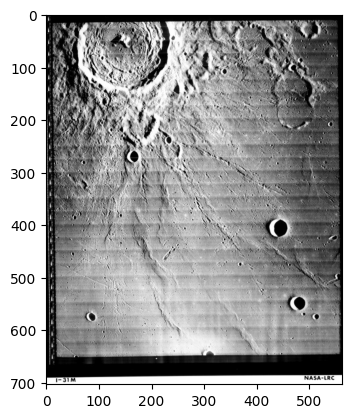

In [38]:
plt.imshow(img, cmap='gray')
plt.show()

In [39]:
# Apply 2D Fourier transform - frequency domain representation
f_transform = np.fft.fft2(img)

# fftshift moves low frequencies to the center of spectrum
f_shift = np.fft.fftshift(f_transform)

# Calculate the amplitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

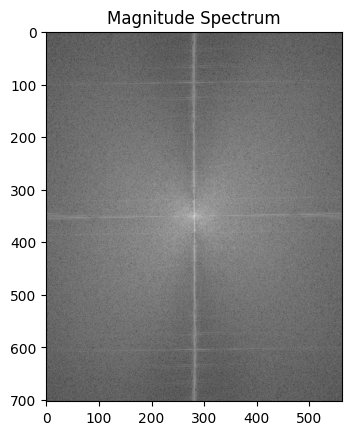

In [40]:
# Vizualization the Specture
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

In [57]:
# Crrate the mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask = np.ones((rows, cols), np.uint8)
mask[:, ccol - 5:ccol + 5] = 0

Text(0.5, 1.0, 'The mask')

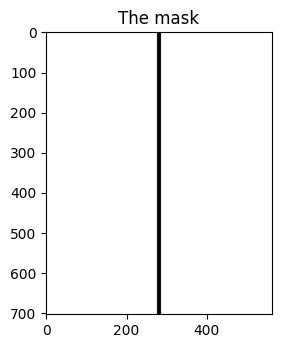

In [58]:
# Vizualization the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("The mask")

In [60]:
# Apply the mask to the Fourier spectrum
f_shift_filtered = f_shift * mask

In [61]:
# Inverse Fourier transform
f_ishift = np.fft.ifftshift(f_shift_filtered)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

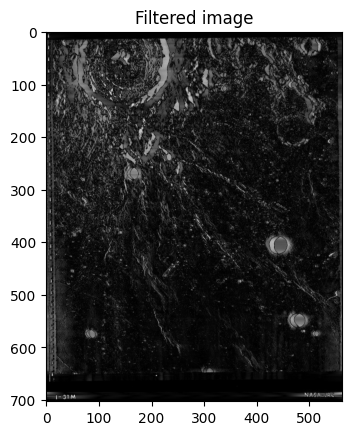

In [62]:
# Vizualization the result
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered image')
plt.show()